# V01 Kosmische Myonen

In [38]:
import numpy as np
import matplotlib
font = {'size': 11.0}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import uncertainties
from uncertainties import ufloat
import uncertainties.unumpy as unp 
from uncertainties.unumpy import (nominal_values as noms, std_devs as stds)

def f(x,a,b):
    return a*x+b

def gauß(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

def gauß2(x,a,b,c):
    return a*np.exp(-((x-b)/(2*c))**(2*32))

def plateau_fkt(x,a,b,c):
    return c/((np.exp(b*(x-a)) +1)*(np.exp(b*(-x-a)) +1) )

In [17]:
df1 = pd.read_csv('data/data1.txt'
                 ,sep = ','
                 ,lineterminator='\n'
                 #,skiprows=(0)
                 ,header = (0)
                 )
df2 = pd.read_csv('data/data2.txt'
                 ,sep = ','
                 ,lineterminator='\n'
                 ,header = 0
                 ,skiprows = (0,1)
                 ,names = ['Puls','Bin']
                 )
df3 = pd.read_csv('data/data3.txt'
                 ,lineterminator='\n'
                 ,names = ['Count']
                 )

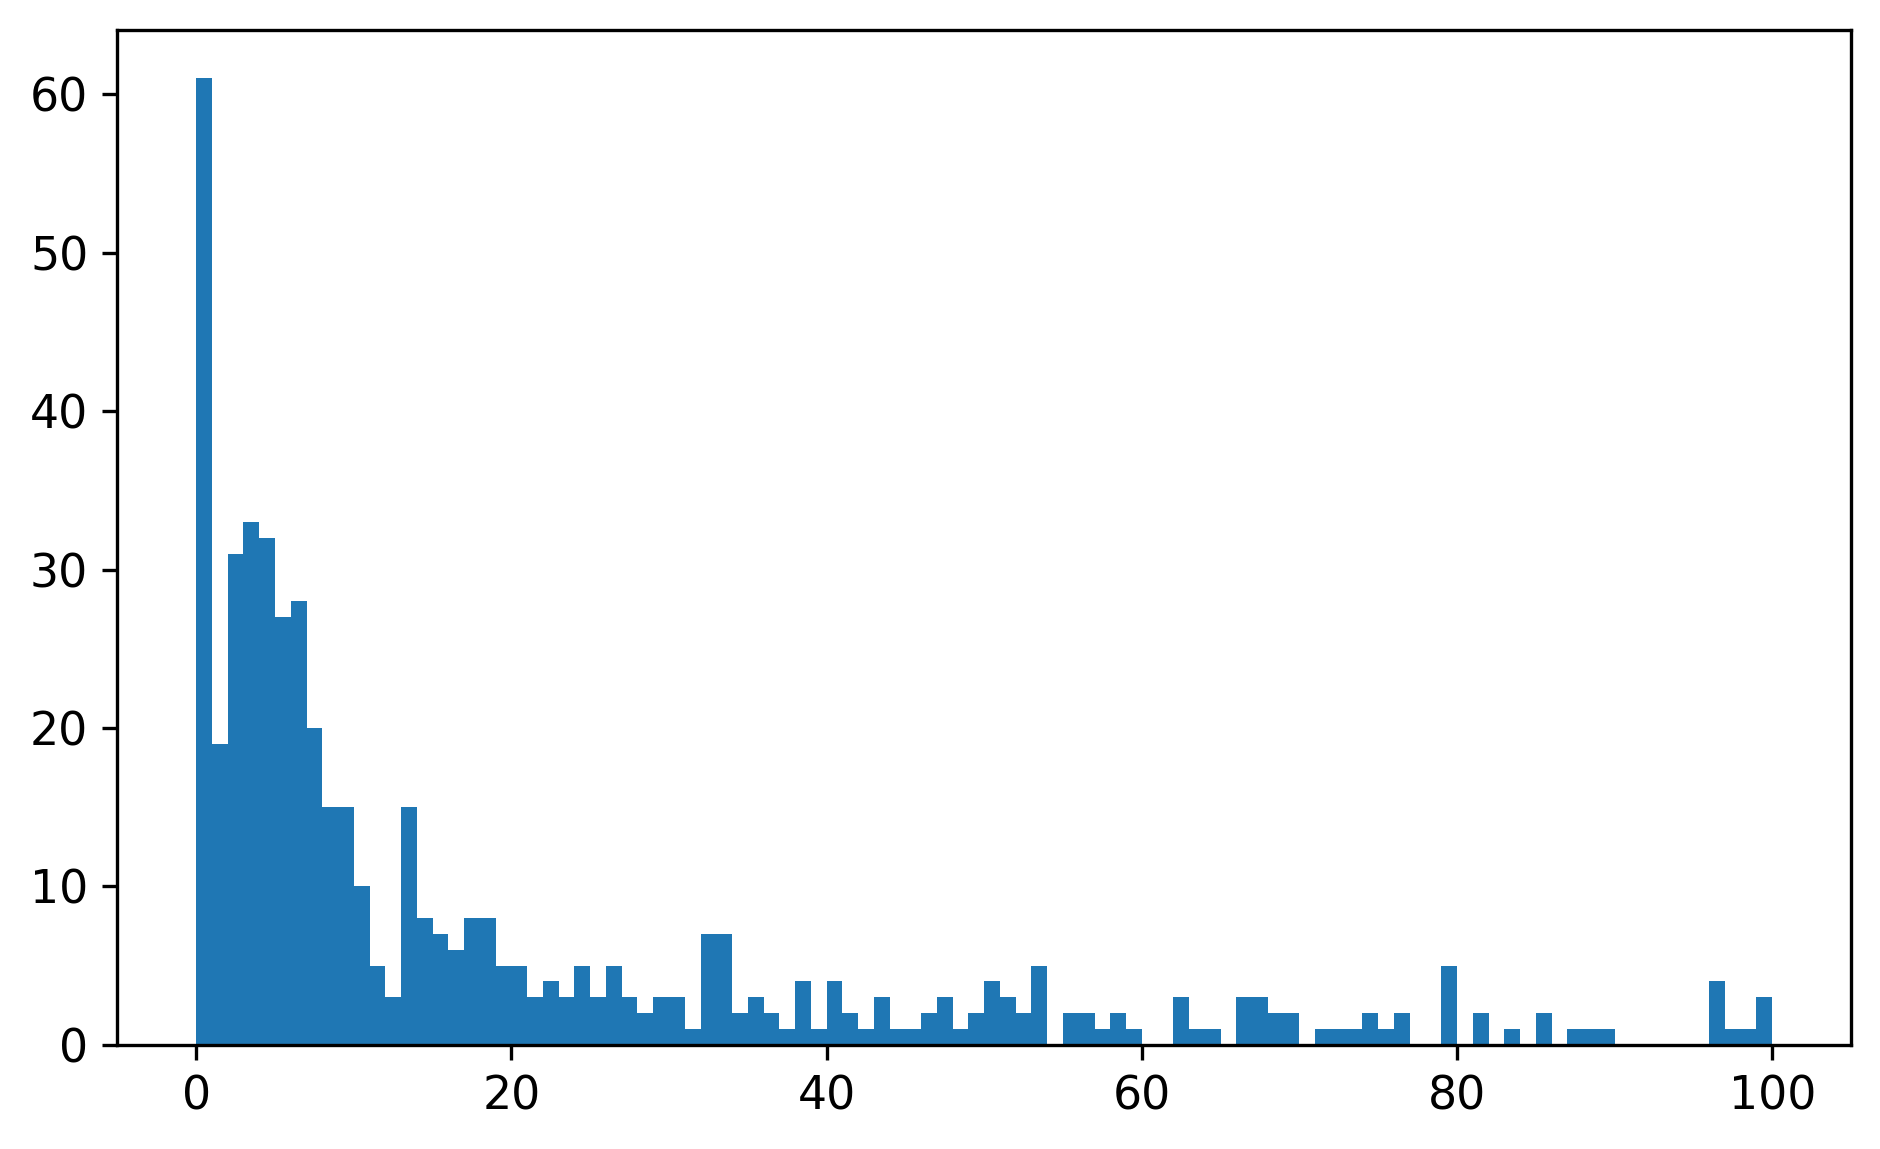

In [18]:
plt.figure(figsize=(6.4,3.96),dpi=300)
plt.hist(df3['Count'],bins = 100,range = (0,100));
plt.tight_layout()

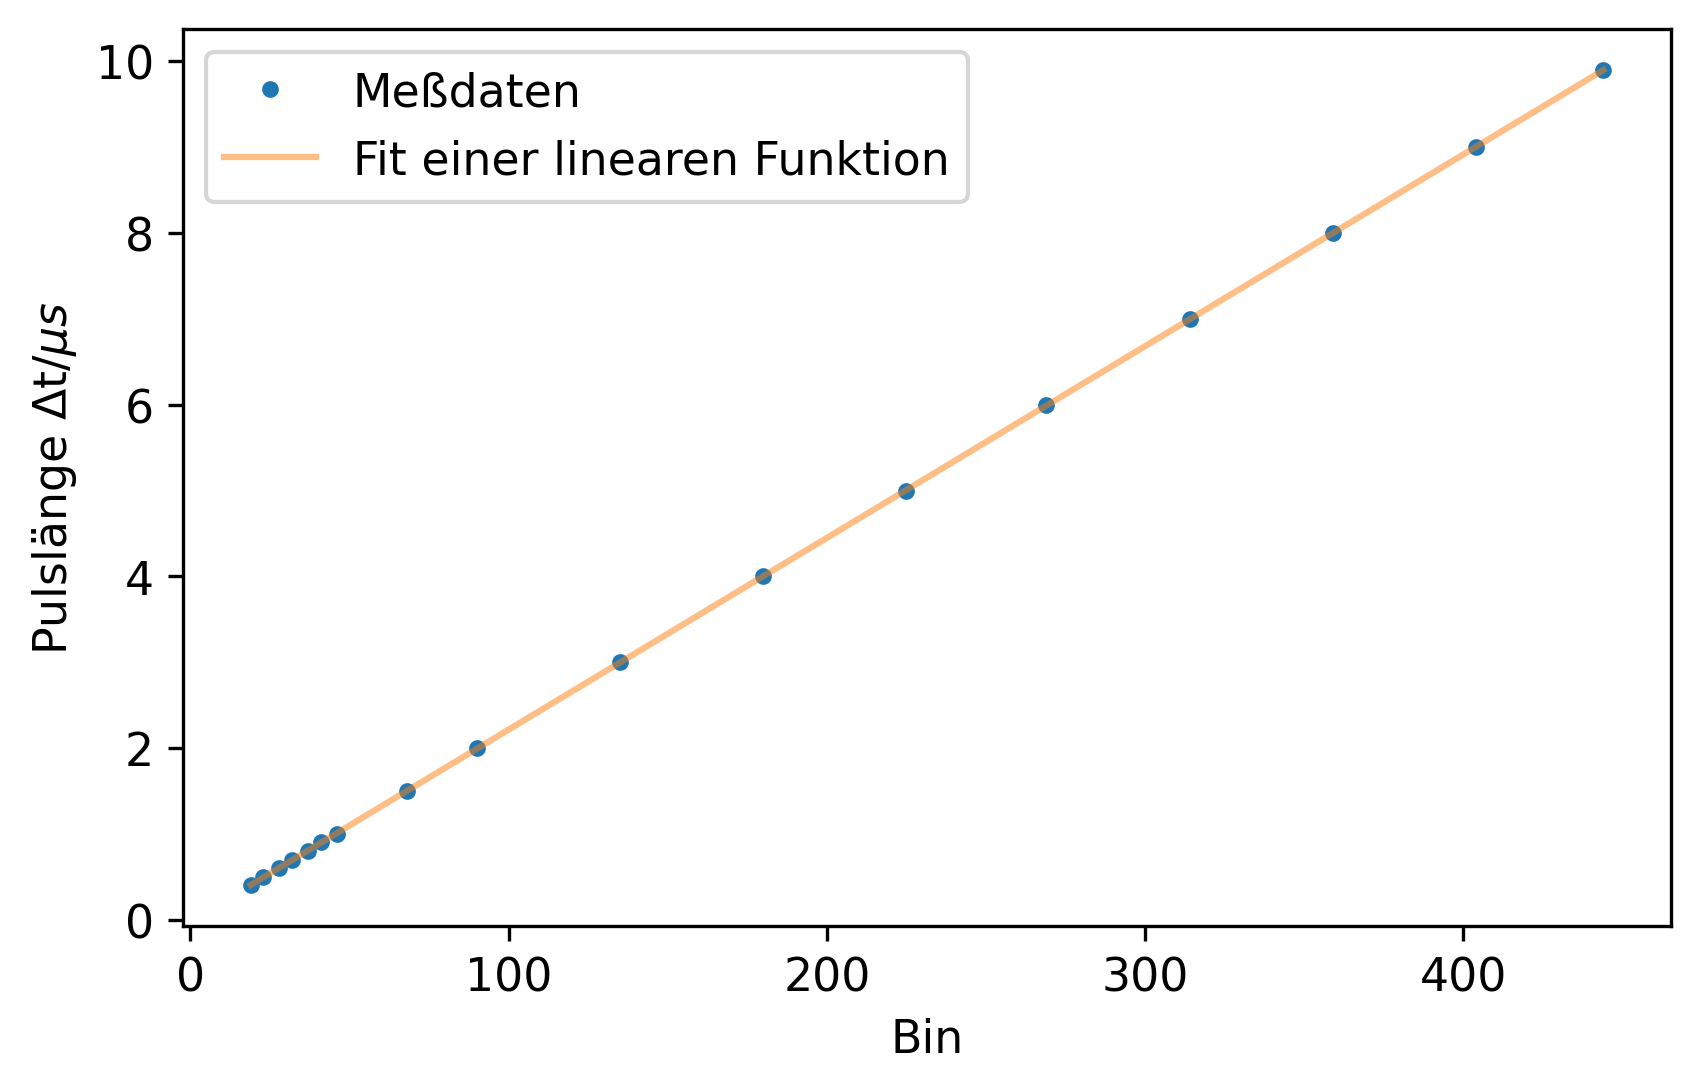

In [19]:
params1,cov = curve_fit(f,df2['Bin'],df2['Puls'])
errors = np.sqrt(np.diag(cov))
params1_err = unp.uarray(params1,errors)
err = params1_err[0]*df2['Bin']+params1_err[1]

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df2['Bin']
         ,df2['Puls']
         ,'.'
         ,label = 'Meßdaten'
        )
plt.plot(df2['Bin']
         ,f(df2['Bin'],*params1)
         ,alpha = 0.5
         ,label = 'Fit einer linearen Funktion'
        )
plt.xlabel('Bin')
plt.ylabel(f'Pulslänge $\Delta$t/$\mu s$')
plt.legend(loc = 'best')
None

In [20]:
params1

array([ 0.02234201, -0.01977661])

In [21]:
params1_err

array([0.022342005300902912+/-1.0202240187835092e-05,
       -0.019776611322122717+/-0.0021881755910382115], dtype=object)

def f(x,a,b):
    return a*x+b
    
a = 0.022342005300902912+/-1.0202240187835092e-05
b = -0.019776611322122717+/-0.0021881755910382115

In [22]:
#f(np.arange(512)[df3['Count'] != 0],*params1)
df3[df3['Count'] != 0].to_numpy()

array([[287],
       [100],
       [243],
       [ 81],
       [ 97],
       [ 98],
       [ 89],
       [100],
       [ 74],
       [ 79],
       [ 96],
       [ 96],
       [ 87],
       [ 79],
       [ 85],
       [ 79],
       [ 96],
       [ 67],
       [ 72],
       [ 83],
       [ 96],
       [ 81],
       [ 76],
       [ 74],
       [ 69],
       [ 99],
       [ 85],
       [ 88],
       [ 69],
       [ 75],
       [ 66],
       [ 79],
       [ 68],
       [ 53],
       [ 62],
       [ 71],
       [ 67],
       [ 76],
       [ 79],
       [ 58],
       [ 73],
       [ 50],
       [ 55],
       [ 66],
       [ 63],
       [ 67],
       [ 56],
       [ 57],
       [ 64],
       [ 59],
       [ 58],
       [ 55],
       [ 51],
       [ 68],
       [ 47],
       [ 44],
       [ 66],
       [ 56],
       [ 52],
       [ 53],
       [ 51],
       [ 62],
       [ 50],
       [ 51],
       [ 49],
       [ 41],
       [ 45],
       [ 46],
       [ 53],
       [ 38],
       [ 62],
      

In [23]:
time = ufloat(250_093,0)
start = ufloat(4_185_569,np.sqrt(4_185_569))
rate = start/time
t_such = ufloat(2*10**(-5),0)
p_1 = (t_such*rate)*unp.exp(-(t_such*rate)) * (start)
U = p_1/451

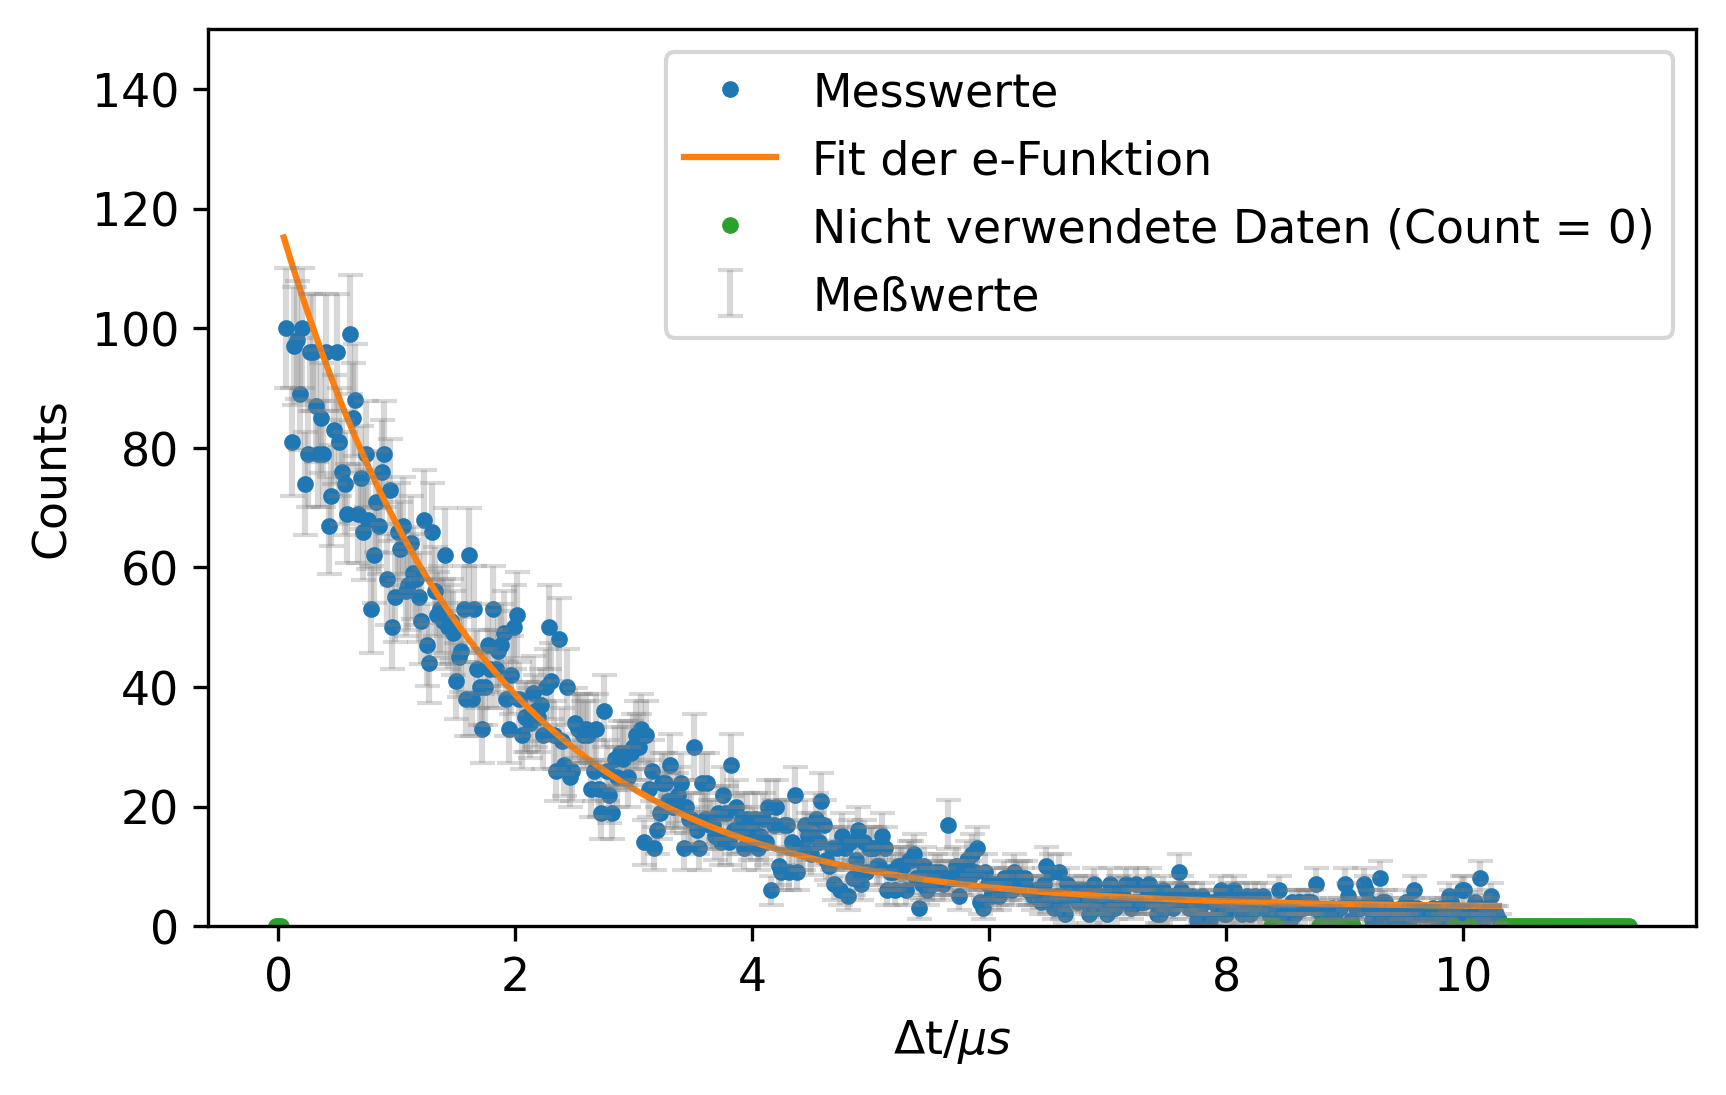

In [24]:
def e(x,A,B):
    return A*np.exp(-B*x)+noms(U)

xdata = f(np.arange(512)[df3['Count'] != 0],*params1)
ydata = df3[df3['Count'] != 0]['Count'].to_numpy()

params2,cov = curve_fit(e
                        ,xdata
                        ,ydata
                       )
errors = np.sqrt(np.diag(cov))
params2_err = unp.uarray(params2,errors)

plt.figure(figsize=(6.4,3.96),dpi=300)

plt.plot(xdata
         ,ydata
         ,'.'
         ,label = 'Messwerte'
        )
plt.plot(xdata
         ,e(xdata,*params2)
         ,label = 'Fit der e-Funktion'
        )
plt.plot(f(np.arange(512)[df3['Count'] == 0],*params1)
         ,df3[df3['Count'] == 0]['Count'].to_numpy()
         ,'.'
         ,label = 'Nicht verwendete Daten (Count = 0)'
        )
plot_errorbar = True
if plot_errorbar:
    plt.errorbar(f(np.arange(512)[df3['Count'] != 0],*params1)
                     ,df3[df3['Count'] != 0]['Count'].to_numpy()
                     ,yerr = np.sqrt(df3['Count'][df3['Count'] != 0])
                     ,fmt = '.'
                     ,label = 'Meßwerte'
                     ,ecolor = 'grey'
                     ,alpha = 0.3
                     ,markersize=0
                     ,capsize=3
                    )

plt.ylim((0,150))
# plt.xlim((0,10))
plt.xlabel(f'$\Delta$t/$\mu s$')
plt.ylabel(f'Counts')
plt.legend(loc = 'best')
None

In [25]:
params2_err

array([115.21488293870937+/-2.79129039987626,
       0.586435073773191+/-0.019679873858418483], dtype=object)

In [26]:
lambda_0 = params2_err[1]
tau = 1/lambda_0
tau_theo = 2.197
a = (tau_theo-tau)/tau_theo
a

0.22384223591723992+/-0.02604668031381846

In [27]:
tau

1.705218607689824+/-0.057224556649459156

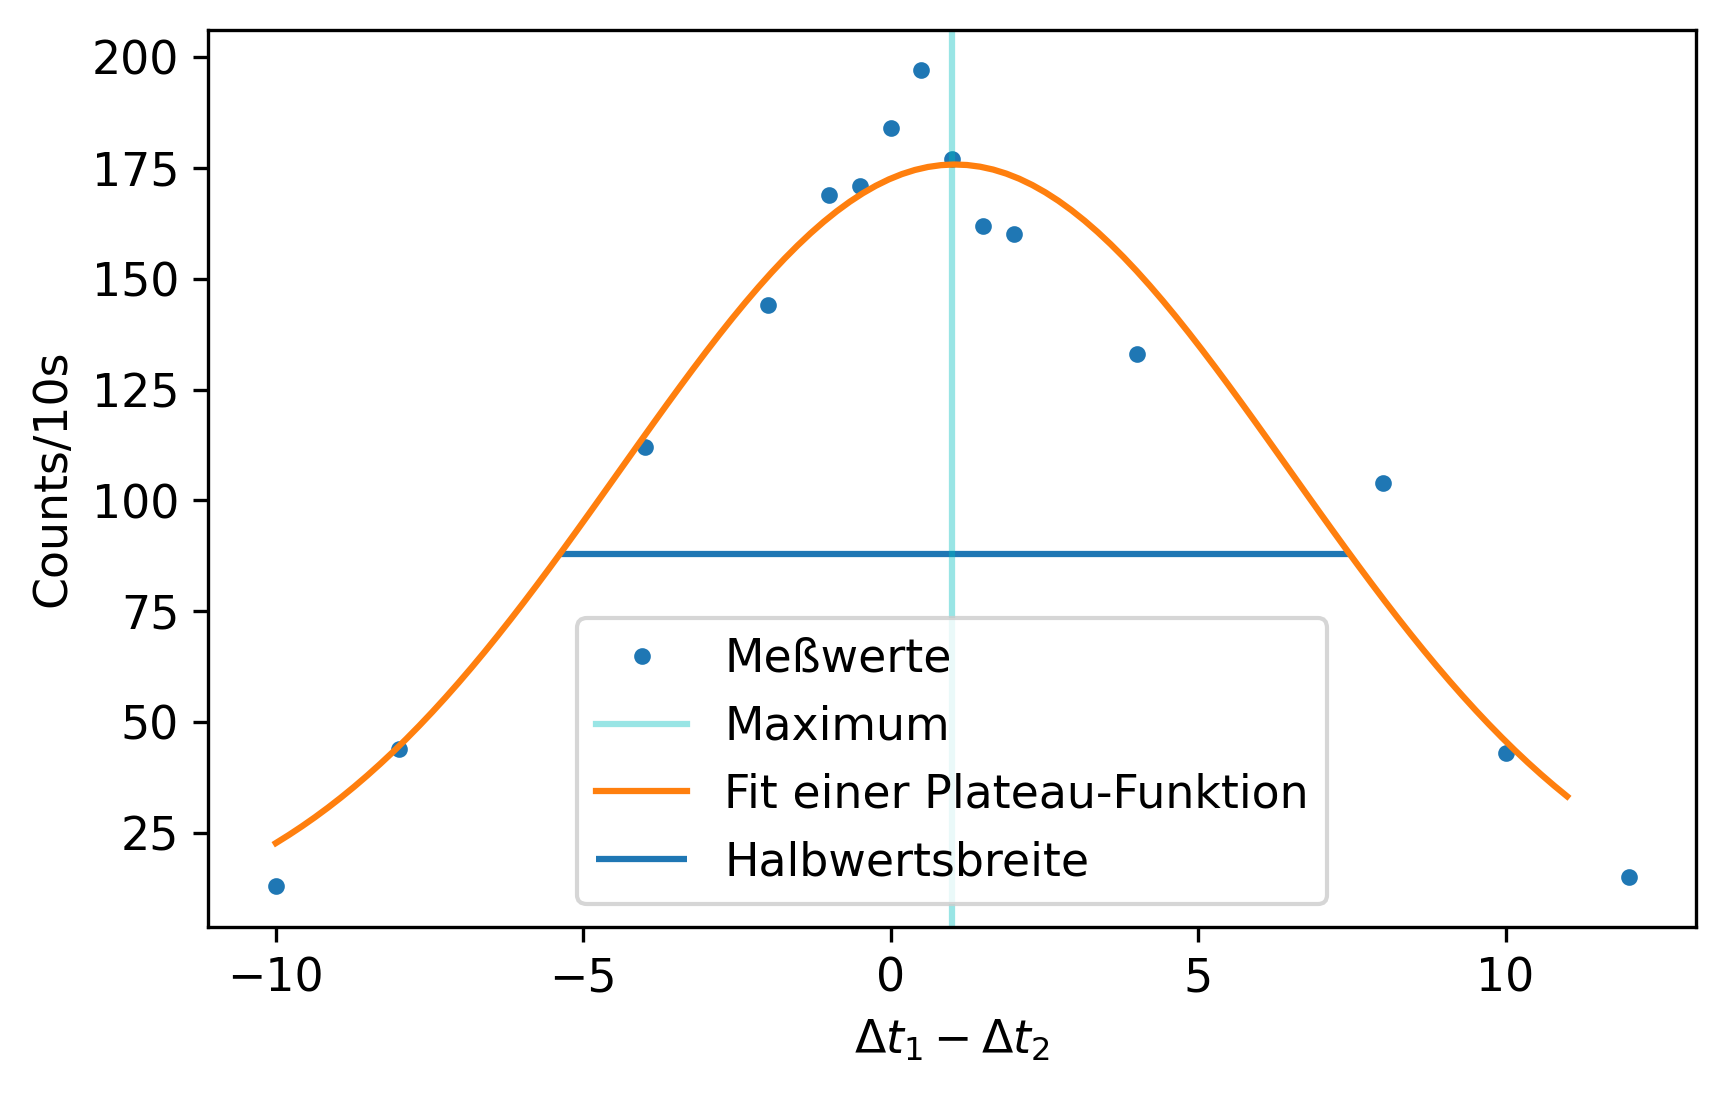

In [46]:
params3,cov = curve_fit(gauß,df1['Delay'],df1['Rate'])
errors = np.sqrt(np.diag(cov))
params3_err = unp.uarray(params3,errors)
err = params1_err[0]*df1['Delay']+params1_err[1]
x = np.linspace(-10,11,100)

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df1['Delay']
             ,df1['Rate']
             #,yerr = np.sqrt(df1['Rate'])
             ,'.'
             ,label = 'Meßwerte'
             #,ecolor = 'grey'
             #,capsize=3
            )
plt.hlines(y = 0.5*gauß(df1['Delay'],*params3)[8]
           ,xmin = -5.4
           ,xmax = 7.45
           ,label = 'Halbwertsbreite'
          )
plt.axvline(x = 1
            ,color = 'c'
            ,alpha = 0.4
            ,label = 'Maximum'
            )

plt.plot(x
         ,gauß(x,*params3)
         ,label = 'Fit einer Plateau-Funktion'
        )
plt.xlabel(f'$\Delta t_1 - \Delta t_2$')
plt.ylabel(f'Counts/10s')
plt.legend(loc = 'best')
None

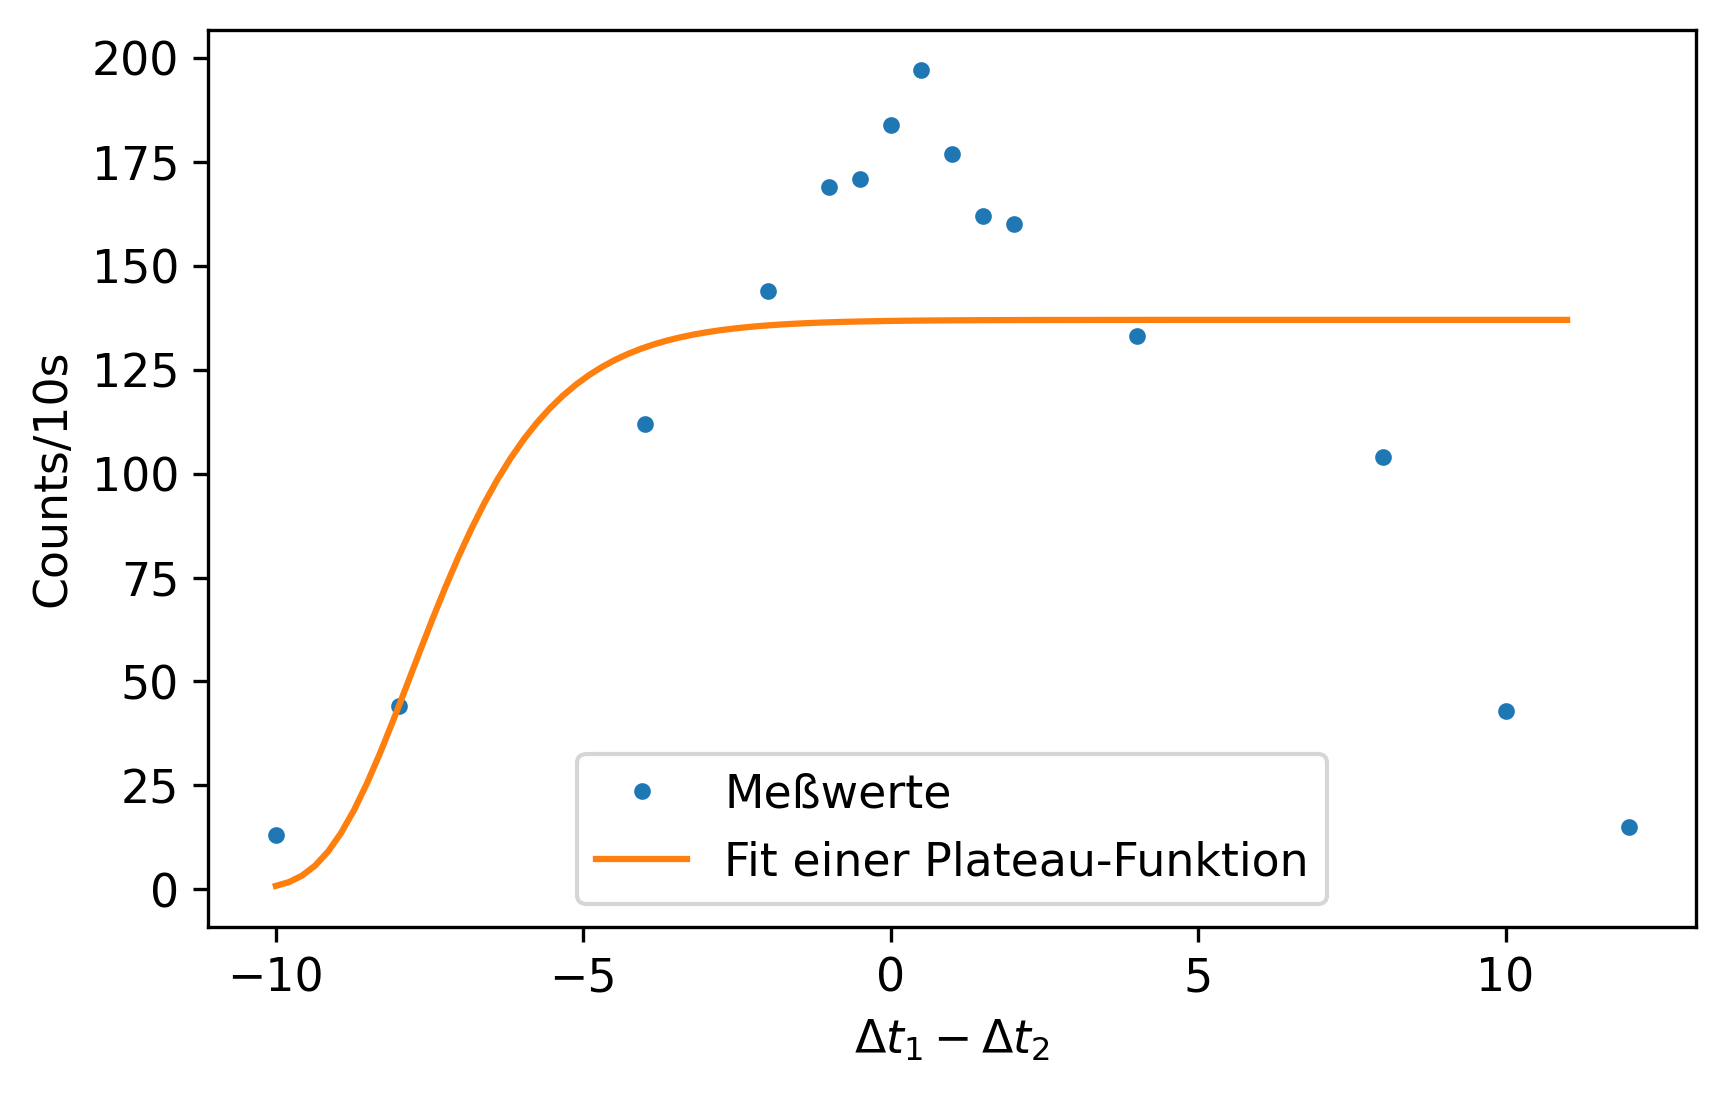

In [40]:
params4,cov = curve_fit(gauß2,df1['Delay'],df1['Rate'])
errors = np.sqrt(np.diag(cov))
params4_err = unp.uarray(params4,errors)
x = np.linspace(-10,11,100)

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df1['Delay']
             ,df1['Rate']
             #,yerr = np.sqrt(df1['Rate'])
             ,'.'
             ,label = 'Meßwerte'
             #,ecolor = 'grey'
             #,capsize=3
            )

plt.plot(x
         ,gauß2(x,*params4)
         ,label = 'Fit einer Plateau-Funktion'
        )
plt.xlabel(f'$\Delta t_1 - \Delta t_2$')
plt.ylabel(f'Counts/10s')
plt.legend(loc = 'best')
None

/Users/konstantinmrozik/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


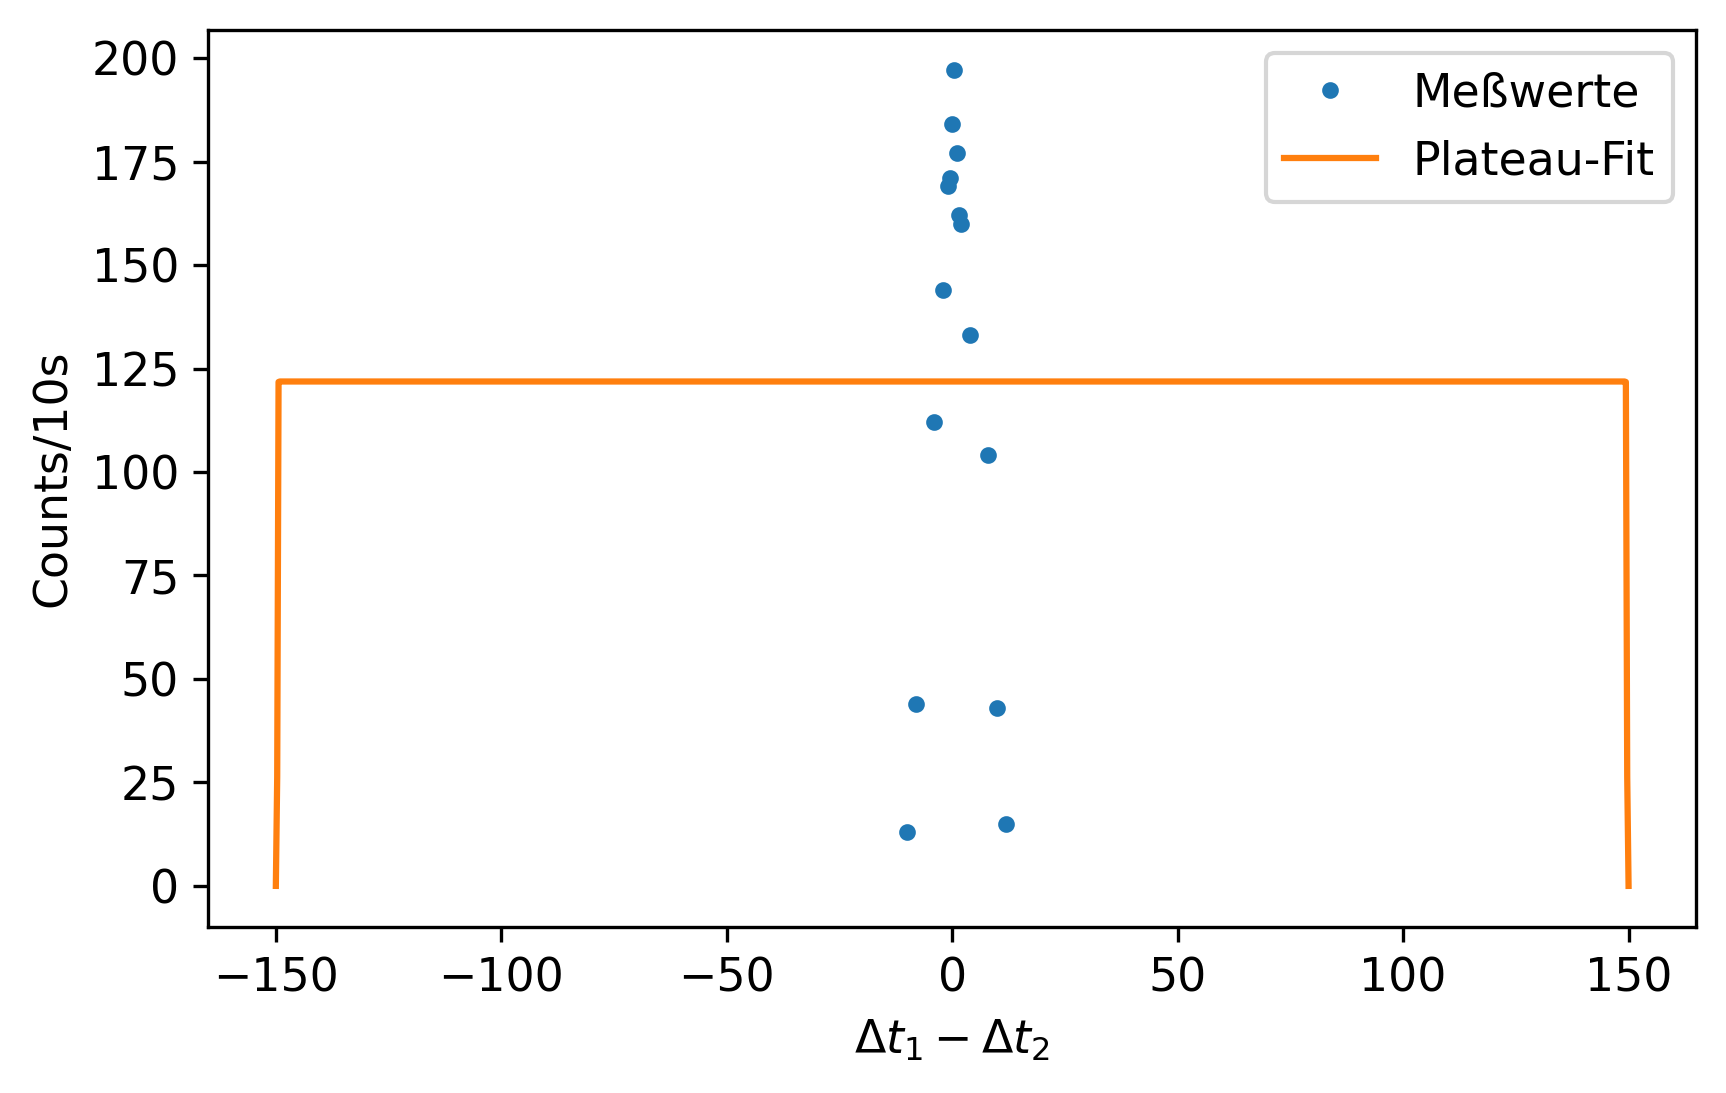

In [41]:
params5,cov = curve_fit(plateau_fkt,df1['Delay'],df1['Rate'])
errors = np.sqrt(np.diag(cov))
params5_err = unp.uarray(params5,errors)
x = np.linspace(-150,150,1000)

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df1['Delay']
             ,df1['Rate']
             #,yerr = np.sqrt(df1['Rate'])
             ,'.'
             ,label = 'Meßwerte'
             #,ecolor = 'grey'
             #,capsize=3
            )

plt.plot(x
         ,plateau_fkt(x,*params5)
         ,label = 'Plateau-Fit'
        )
plt.xlabel(f'$\Delta t_1 - \Delta t_2$')
plt.ylabel(f'Counts/10s')
plt.legend(loc = 'best')
None

In [42]:
params5_err

array([149.65251921078286+/-inf, 27.298932459964938+/-inf,
       121.86666666081669+/-inf], dtype=object)

In [ ]:
from scipy.signal import find_peaks 
from scipy.interpolate import UnivariateSpline

In [ ]:
df1['Delay']

In [ ]:
len(gauß(df1['Delay'],*params3))

In [ ]:
x = np.linspace(-10, 10, 15)

In [ ]:
spline = UnivariateSpline(x
                          ,gauß(df1['Delay'],*params3) - gauß(df1['Delay'],*params3)[find_peaks(gauß(df1['Delay'],*params3))[0][0]]/2
                         )

In [ ]:
spline.roots()

In [ ]:
0.5*gauß(df1['Delay'],*params3)[8]

In [ ]:
params3_err

def gauß(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))
    
a = 175.79231504815743+/-5.086698119240312  
x_0 = 1.0418186298806922+/-0.3140554503078201  
sigma = 5.454819801744527+/-0.29204105484660253  

## Rechnungen


In [ ]:
time = ufloat(250_093,0)
start = ufloat(4_185_569,np.sqrt(4_185_569))
rate = start/time
t_such = ufloat(2*10**(-5),0)
p_1 = (t_such*rate)*unp.exp(-(t_such*rate)) * (start)
U = p_1/451

In [ ]:
rate


In [ ]:
len(df3[df3['Count'] != 0])

In [ ]:
(t_such*rate)*unp.exp(-(t_such*rate))

In [ ]:
p_1 = (t_such*rate)*unp.exp(-(t_such*rate)) * (start)
p_1

In [ ]:
U = p_1/451

In [ ]:
noms(U)